# Project Title: **Predicting Student Exam Performance**

**Author:** [Yassine Mouadi]

**Date:** July 27, 2025

**Dataset:** Students Performance Dataset (Kaggle: `rabieelkharoua/students-performance-dataset`)


## Table of Contents

1. Introduction  
2. Environment Setup and Data Loading  
   2.1 Libraries Used  
   2.2 Load Dataset  
3. Exploratory Data Analysis (EDA)  
   3.1 Initial Assessment of Missing Values and Duplicates  
   3.2 Univariate Analysis (Individual Feature Distributions)  
       3.2.1 Numerical Features  
       3.2.2 Categorical Features  
 4. Data Preprocessing  
   4.1 Handling Missing and Infinite Values  
   4.2 Feature Selection and Target Variable Preparation  
   4.3 Feature Scaling (StandardScaler)  
5. Custom Machine Learning Functions  
   5.1 Cost Function (`cost_function`)  
   5.2 Prediction Function (`predict`)  
   5.3 Gradient Descent Algorithm (`gradient_descent`)  
6. Model Training  
   6.1 Training the Model with Gradient Descent  
   6.2 Analyzing Cost History  
7. Model Evaluation and Prediction  
   7.1 Learned Model Parameters and Making a New Prediction  
   7.2 Visualizing Model Performance and Insights  
8. Conclusion and Next Steps


## 1. Introduction

This notebook aims to develop a predictive model for **student exam scores**. Accurately forecasting student performance can help educators make informed decisions for educational institutions to **enable timely interventions and optimize resource allocation** to foster academic success.

The dataset utilized for this analysis includes key information relating to student academic behaviors and backgrounds, specifically:
* **`StudyTimeWeekly`**: Hours spent studying per week.
* **`Absences`**: Number of absences from school.
* **`ParentalEducation`**: Parental education level.
* **`Extracurricular`**: Participation in extracurricular activities (binary: Yes/No).

The goal is to predict the **`GPA`** (Grade Point Average) based on these input features, since GPA is used as the proxy for exam scores in this dataset.

**Objectives of this Analysis:**
* Perform **Exploratory Data Analysis (EDA)** to understand the dataset's characteristics, distributions, and initial relationships between variables.
* Conduct **Data Preprocessing**, including handling missing values, selecting relevant features, and applying feature scaling, to prepare the data for machine learning.
* Implement and utilize **Custom Machine Learning Functions** (prediction, cost, and gradient descent) to build a linear regression model.
* Execute **Model Training** using the Gradient Descent algorithm to learn the optimal weights and bias for predicting student GPA.
* Perform **Model Evaluation and Prediction** by assessing the trained model's performance and demonstrating its ability to predict GPA for new student data.
* Conclude with a summary of findings and outline **Next Steps** for further development.

## 2. Environment Setup and Data Loading

Before we dive into the analysis, let's set up our working environment by importing all necessary libraries, and then load our dataset:



### 2.1. Libraries Used in This Project

In [3]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


### 2.2. Load Dataset

We will now load the student performance dataset. We also need to ensre error handling is included, so that the file is found and loaded correctly.

In [4]:
file_path = "/home/yassine/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2/Student_performance_data .csv"

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully from %s" % file_path)
    print("Initial shape of the dataset: %s" % str(data.shape))
except FileNotFoundError:
   print("Error: File not found on the path provided.")
   sys.exit()
except Exception as e: 
   print("An error was found while opening the dataset: %s" % str(e)) 
   sys.exit()

print("\nFirst 5 rows of the dataset:") 
display(data.head())

print("\nDataset Info:")
data.info() 

print("\nDataset Description (Numerical Columns):")
display(data.describe())


Dataset loaded successfully from /home/yassine/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2/Student_performance_data .csv
Initial shape of the dataset: (2392, 15)

First 5 rows of the dataset:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB

Dataset 

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## 3. Exploratory Data Analysis (EDA)

This section delves into a deeper understanding of our dataset's characteristics, identifying initial patterns, potential issues, and distributions of individual features.

### 3.1. Initial Assessment of Missing Values and Duplicates

We've already performed a quick overview of the data during data loading in Section 2. 

Here, we'll explicitly check for the presence of any remaining missing values across all columns and identify any duplicate rows that could skew our analysis. 

First, we check the missing values.

Then, we check for the amount of duplicated rows and sum how many duplicates we have. Afterwards, we drop those dplicates, and make sure the initial values are updated as well.

In [5]:

print("Number of missing values per column:")
print(data.isnull().sum())

duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows: %s" % str(duplicates)) #

if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicates were dropped successfully. New shape: %s" % str(data.shape))
else:
    print("No duplicate rows found in the dataset.")

Number of missing values per column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Number of duplicate rows: 0
No duplicate rows found in the dataset.


### 3.2. Univariate Analysis (Individual Feature Distributions)

Univariate analysis involves examining each feature individually to understand its distribution, central tendency, and spread. This is crucial for gaining insights into the nature of our data and identifying any irregularities before preprocessing.

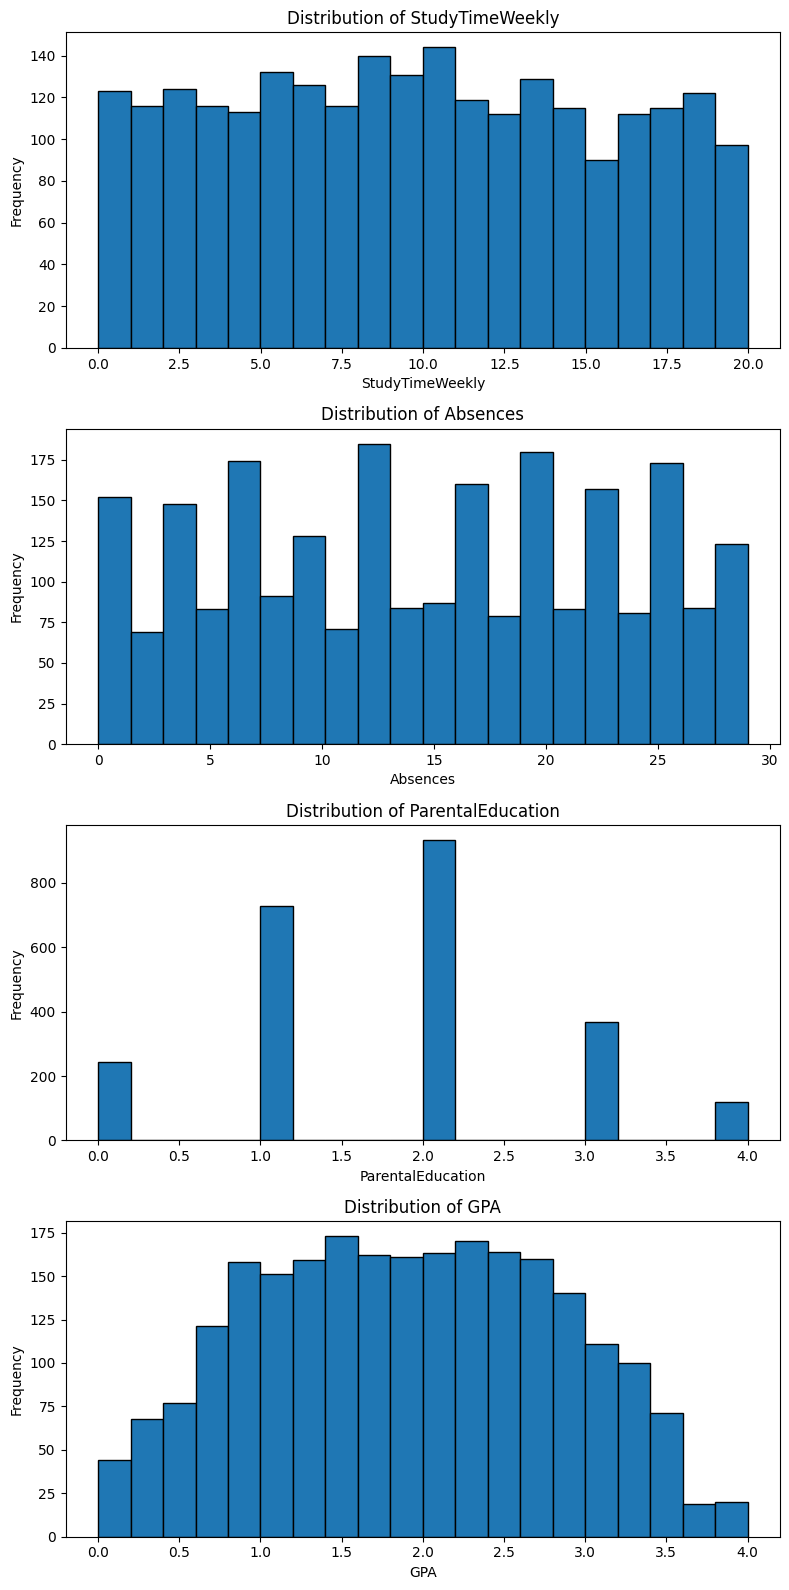

In [6]:
numerical_features = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'GPA']
size = len(numerical_features)

plt.figure(figsize=(8, size * 4))

i = 0
for feature in numerical_features:
    plt.subplot(size, 1, i + 1)
    plt.hist(data[feature], bins=20, edgecolor='black')
    plt.title('Distribution of %s' % feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    i += 1

plt.tight_layout()
plt.show()

### 3.2.2. Categorical Features

Even if represented by numbers, features like `Extracurricular` (0 or 1) and `ParentalEducation` (ordinal levels) are inherently categorical.


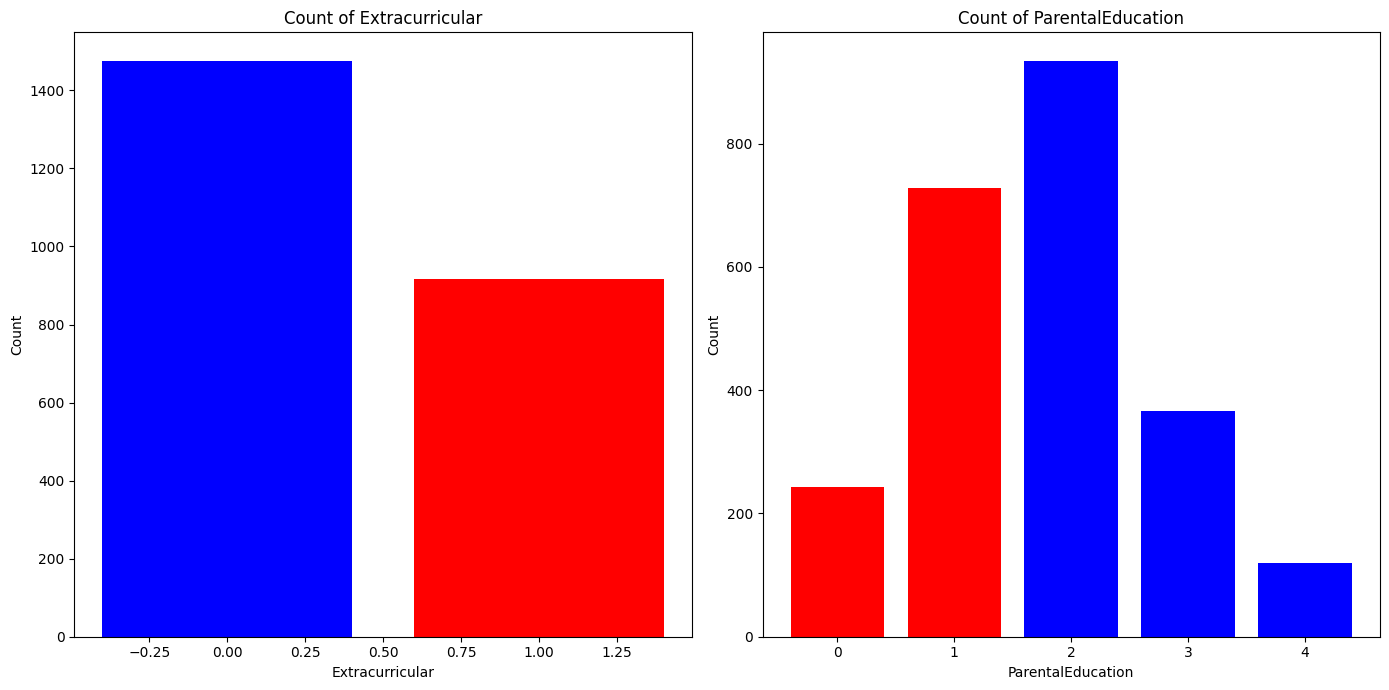


Value counts for categorical features:

--- Extracurricular ---
Extracurricular
0    1475
1     917
Name: count, dtype: int64
    0: 61.66%
    1: 38.34%

--- ParentalEducation ---
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
    2: 39.05%
    1: 30.43%
    3: 15.34%
    0: 10.16%
    4: 5.02%


In [7]:

categorical_features = ['Extracurricular', 'ParentalEducation']

plt.figure(figsize=(14, 7))
i = 0
for feature in categorical_features:
    plt.subplot(1, len(categorical_features), i + 1)

    counts = data[feature].value_counts()
    categories = counts.index
    values = counts.values
    
    plt.bar(categories, values, color=['blue', 'red']) 
    plt.title('Count of %s' % feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    i += 1

plt.tight_layout()
plt.show()

print("\nValue counts for categorical features:")
for feature in categorical_features:
    print("\n--- %s ---" % feature)
    counts = data[feature].value_counts()
    total = len(data[feature])
    
    print(counts)
    for category, count in counts.items():
        percentage = (float(count) / total) * 100
        print("    %s: %s%%" % (str(category), str(round(percentage, 2))))

## 4. Data Preprocessing

We now transform raw data into a clean and organized format suitable for model training. This section covers handling missing values, selecting relevant features, and scaling them to a comparable range.

### 4.1. Handling Missing and Infinite Values

We will use the most optimal aproach: filling any remaining missing numerical values with the mean of their respective columns.

Additionally, we will ensure there are no infinite values, replacing them with NaN and then imputing with the mean as well, to prevent errors in our model.

In [8]:

data.fillna(data.mean(numeric_only=True), inplace=True)
print("Missing numerical values filled with column means successfully.")


data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True) 

print("Infinite values handled and replaced with column means successfully.")

print("\nNumber of missing values after handling:")
print(data.isnull().sum())

Missing numerical values filled with column means successfully.
Infinite values handled and replaced with column means successfully.

Number of missing values after handling:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


### 4.3. Feature Scaling (StandardScaler) 

It's where we prepare our numerical data for our machine learning model, using a technique called feature scaling.

This is because using a model like linear regression with gradient descent would lead to the model treating features with larger values unfairly. For example, `StudyTimeWeekly` can range from 0 to 20, while `ParentalEducation` would only range between 0 and 4.

We first initialize the `StandardScaler` that standardizes our data. Then, based on the mean and standard deviation of each feature, it stores the calculated values internally.

Then, the transform uses the standard normal distribution formula: `(value - mean) / standard_deviation`, which distributes every value in our `X_raw` data.

In [9]:
selected_features = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'Extracurricular']
X_raw = data[selected_features]
print("Selected Features (X) raw data shape: %s" % str(X_raw.shape))

Y = data['GPA'].values
print("Target variable (Y) data shape: %s" % str(Y.shape))

print("\nFeatures and target variable successfully prepared for scaling.")

scaler = StandardScaler()
print("StandardScaler initialized.")

X = scaler.fit_transform(X_raw)
print("Features (X) successfully scaled using StandardScaler. New shape: %s" % str(X.shape))

print("\nData preprocessing complete. Data is now ready for model building.")

Selected Features (X) raw data shape: (2392, 4)
Target variable (Y) data shape: (2392,)

Features and target variable successfully prepared for scaling.
StandardScaler initialized.
Features (X) successfully scaled using StandardScaler. New shape: (2392, 4)

Data preprocessing complete. Data is now ready for model building.


## 5. Custom Machine Learning Functions

In this section, we define the essential mathematical components that form the backbone of our custom Linear Regression model. We'll create functions for making predictions, calculating the model's error (cost), and optimizing the model's parameters using the Gradient Descent algorithm.

What we're trying to build is essentially a **`machine learning model `**, which is a program that learns to identify patterns or make predictions from data that we would provide.

Before building our model, we'll define a simple `predict` function, which implements the basic linear model equation.



### 5.1. Prediction Function (`predict`)

It calculates a predicted output based on a given set of input features, along with the model's current weights and bias. For a single input example, it applies the linear equation: prediction = (weight * feature) + bias. But since we're dealing with multiple features, it's the dot product of the weights vector and the input features vector, plus the bias.


$$
\hat{y} = b + \sum_{j=1}^{n} w_j x_j
$$

Where:
* `w` (Weights) are how much 'weight' the model assigns to each individual input; a higher weight for a feature means the said feature has a        stronger influence on the final predictions
* `x` (Input features) are the numerical values contained within our dataset.
* `b` (Bias term)It's like an overall offset for the prediction, allowing the model to make a prediction that isn't solely depended on the          input feautures.

Intuitively, it's predicting the **`exam_score`** based on the several pieces of information that our dataset would contain.

And, by doing this, we find the best weight `**w'**` and bias `**b'**` that most accrately fit our model.

In python, it is implemented this way:


In [10]:

def predict(w,b,x):
    return np.dot(w,x) + b

### 5.2. Cost Function (`cost_function`)

Simpling making these predictions isn't enough. We need to verify whether they're close to the true dataset that we originally have.

To do that, we use: the cost function: J(w,b), defined by:

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \underbrace{\mathbf{w} \cdot \mathbf{x}^{(i)} + b}_{\text{prediction}} - y^{(i)} \right)^2
$$
**Where:**
- $\mathbf{w}$ = weight vector $(w_1, w_2, ..., w_n)$
- $\mathbf{x}$ = feature vector $(x_1, x_2, ..., x_n)$
- $b$ = bias term
- $m$ = number of training examples

It's role is simple: it quantifies the error between our predictions and the true values we had in the data set, giving us a value that determines whether our calculations were correct or not.

In python, the code is as follows:

In [11]:
def cost_function(X, y, w, b):

    m = len(X)
    cost_sum = 0.0
    for i in range(m):
        predictions = predict(w, b, X[i])
        y_i = y[i]
        cost_sum = cost_sum + np.power((predictions - y_i), 2)
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

### 5.3. Gradient Descent Algorithm (`gradient_descent`)

With our prediction and cost functions in place, we need a way for our model to actually "learn" and improve its predictions. That's the job of the `gradient_descent` algorithm.

We can visualize it as: The cost function telling us how high we are on an error "hill." Gradient Descent is the strategy we use to walk down that hill to find the lowest point (where the error is minimized). It does this iteratively, taking small steps.

It is because the actual graph for the cost function is in the shape of a bowl. Hence the naming.

The core idea is to update the weights (`w`) and bias (`b`) by subtracting a fraction of the gradient of the cost function with respect to each parameter. This fraction is controlled by the learning rate.

The update rules are:

$$
w_j = w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j}
$$

$$
b = b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}
$$

**Where:**
* $\alpha$ (alpha) is the `learning_rate`, a setting that determines the size of each step we take down the cost "hill." if it's too big, it might not ever reach the minimum, where as if it it's too small, it'd take too long.
* $\frac{\partial J(\mathbf{w}, b)}{\partial w_j}$ is the partial derivative of the cost function with respect to a specific weight $w_j$. This tells us the "steepness" of the cost function along the $w_j$ dimension.
* $\frac{\partial J(\mathbf{w}, b)}{\partial b}$ is the partial derivative of the cost function with respect to the bias $b$. This tells us the "steepness" of the cost function along the $b$ dimension.

Now, let's look at the actual derivatives for our specific cost function:

The partial derivative of the cost function $J(\mathbf{w}, b)$ with respect to each weight $w_j$ is:

$$
\frac{\partial J(\mathbf{w}, b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

And the partial derivative of the cost function $J(\mathbf{w}, b)$ with respect to the bias $b$ is:

$$
\frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)
$$

Here, $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ represents our model's prediction for the $i$-th training example.

* **`iterations`**: This is simply how many steps we allow the algorithm to take. Each iteration involves calculating these gradients and then updating `w` and `b`.

The function will return the final, optimized `w` and `b` values that our model has learned, along with a `cost_history` list. This history is really useful because we can plot it later to see if our model was indeed getting "smarter" and reducing its error over time.

In [12]:
def gradient_descent(X, y, learning_rate, iterations):
    
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0.0
    m = len(X)
    cost_history = []

    for i in range(iterations):
        f_wb_predictions = np.zeros(m)
        for j in range(m):
            f_wb_predictions[j] = predict(w, b, X[j])

        dj_dw = np.zeros(n_features)
        dj_db_sum = 0.0
        for j in range(m):
            for k in range(n_features):
                dj_dw[k] +=  (f_wb_predictions[j] - y[j]) * X[j][k]
            dj_db_sum += (f_wb_predictions[j] - y[j])
        dw = (1.0 / m) * dj_dw
        db = (1.0 / m) * dj_db_sum

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

## 6. Model Training

With our preprocessing complete and our custom machine learning functions defined, we're ready for the best part: training the model.
This involves feeding our scaled data to the Gradient Descent algorithm to find the optimal weights and bias that minimize our cost function.

### 6.1. Training the Model with Gradient Descent

Here, we'll invoke our `gradient_descent` function. We'll give it our prepared features (`X`) and target (`Y`), set a `learning_rate` (how big each step is), and specify the `iterations` (how many steps to take). The function will then run through its learning process and return the `w` (weights) and `b` (bias) it determined were best, along with the `cost_history`.

In [13]:

learning_rate = 0.01
iterations = 1000

print("Phase 1: Gradient Descent initiated for model training...")

w_learned, b_learned, cost_history = gradient_descent(X, Y, learning_rate, iterations)

print("\nModel training complete.")
print("Learned Weights (w): %s" % str(w_learned))
print("Learned Bias (b): %f" % b_learned)

Phase 1: Gradient Descent initiated for model training...

Model training complete.
Learned Weights (w): [ 1.73933701e-01 -8.42725434e-01 -7.97289516e-04  9.03583870e-02]
Learned Bias (b): 1.906104


### 6.2. Analyzing Cost History

The `cost_history` list records the value of our cost function at each iteration of Gradient Descent. We want to see this cost steadily decrease over time, indicating that our model is successfully learning and getting closer to the optimal solution. 
A decreasing cost history confirms that Gradient Descent is working as intended.

In [15]:

print("\nCost history progression:")
for i in range(len(cost_history)):
    if (i % 100 == 0) or (i == len(cost_history) - 1):
        print("At iteration No %d, the cost was: %f" % (i, cost_history[i]))



Cost history progression:
At iteration No 0, the cost was: 2.191807
At iteration No 100, the cost was: 0.333931
At iteration No 200, the cost was: 0.084654
At iteration No 300, the cost was: 0.051173
At iteration No 400, the cost was: 0.046671
At iteration No 500, the cost was: 0.046065
At iteration No 600, the cost was: 0.045983
At iteration No 700, the cost was: 0.045972
At iteration No 800, the cost was: 0.045970
At iteration No 900, the cost was: 0.045970
At iteration No 999, the cost was: 0.045970


### 📌 Final Model Equation

**GPA = θ₀ + θ₁ × StudyTimeWeekly + θ₂ × Absences + θ₃ × ParentalEducation + θ₄ × Extracurricular**

Where:
- θ₀ (Intercept): shown in output below
- θ₁..θ₄: Coefficients learned from gradient descent


## 7. Model Evaluation and Prediction

After training our model, it's time to see how well it actually performed and to use it for its intended purpose: making predictions. 
This section will cover examining the parameters our model learned and then applying it to predict the GPA for a hypothetical new student. We'll also visualize various aspects of the model's performance to gain deeper insights.

### 7.1. Learned Model Parameters and Making a New Prediction

For the actual weights (`w`) and bias (`b`) that our Gradient Descent algorithm found, these numbers are the essence of our learned model; they represent the relationships and influence each feature has on the predicted GPA. A positive weight means that feature positively contributes to GPA, and vice versa.

Once we have these learned parameters, we can use our `predict` function to estimate the GPA for a completely new student. 

We'll simulate a new student's data, scale it just like we did for our training data, and then pass it through our model to get a predicted GPA.

In [16]:

print("Learned Model Parameters:")
print("  Weights (w): %s" % str(w_learned))
print("  Bias (b): %f" % b_learned)

new_student_data = np.array([[2.5, 90, 3, 1]])


new_student_scaled = scaler.transform(new_student_data)
print("\nNew student data scaled: %s" % str(new_student_scaled[0]))


predicted_gpa = predict(w_learned, b_learned, new_student_scaled[0])
print("Predicted GPA for the new student: %f" % predicted_gpa)

Learned Model Parameters:
  Weights (w): [ 1.73933701e-01 -8.42725434e-01 -7.97289516e-04  9.03583870e-02]
  Bias (b): 1.906104

New student data scaled: [-1.28671554  8.91350771  1.25350942  1.2682689 ]
Predicted GPA for the new student: -5.715740


### 7.2. Visualizing Model Performance and Insights

We'll generate a series of plots to give us different perspectives on our model's effectiveness, from tracking its learning process to comparing its predictions against reality.

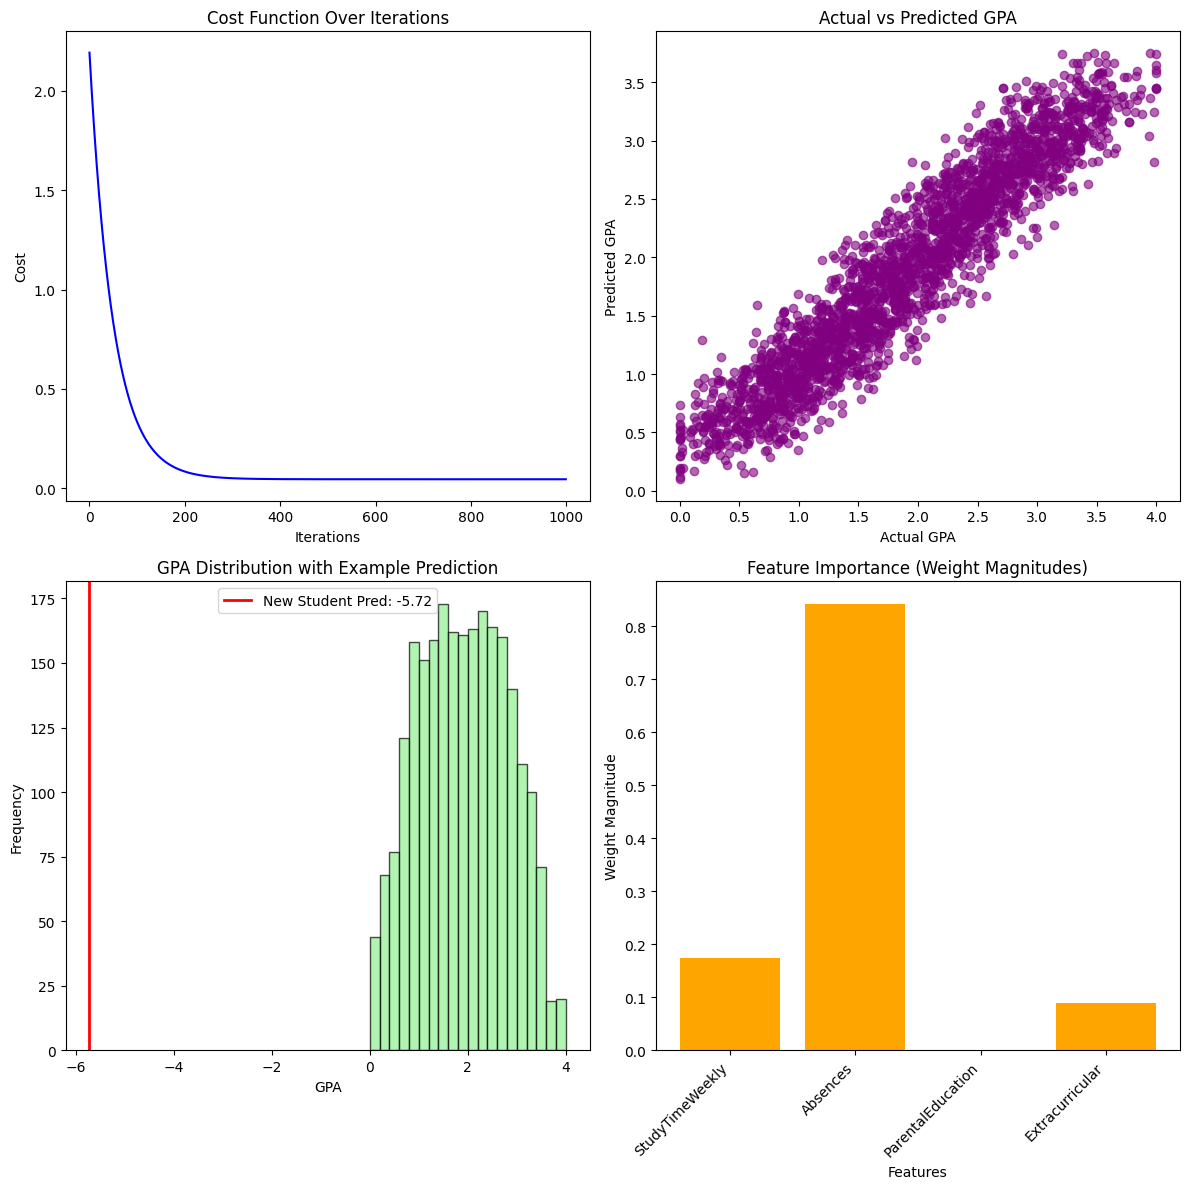

In [17]:

plt.figure(figsize=(12, 12))

# Plot 1: Cost function over iterations
plt.subplot(2, 2, 1)
plt.plot(cost_history, color='blue')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Plot 2: Actual vs predicted values
predictions_on_training_data = []
for i in range(len(X)):
    pred = predict(w_learned, b_learned, X[i])
    predictions_on_training_data.append(pred)

plt.subplot(2, 2, 2)
plt.scatter(Y, predictions_on_training_data, alpha=0.6, color='purple')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')

# Plot 3: GPA distribution with new student prediction
plt.subplot(2, 2, 3)
plt.hist(Y, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(predicted_gpa, color='red', linewidth=2, label='New Student Pred: %s' % str(round(predicted_gpa, 2)))
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distribution with Example Prediction')
plt.legend()

# Plot 4: Feature importance (weight magnitudes)
plt.subplot(2, 2, 4)
features = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'Extracurricular']
plt.bar(features, np.abs(w_learned), color='orange')
plt.xlabel('Features')
plt.ylabel('Weight Magnitude')
plt.title('Feature Importance (Weight Magnitudes)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 8. Conclusion and Next Steps


This project successfully developed a custom Linear Regression model for predicting student GPA, demonstrating a complete machine learning pipeline from data understanding to model evaluation.


We initiated the process with a thorough exploratory data analysis, which informed our data preprocessing steps, ensuring the dataset was clean and appropriately scaled. 


A cornerstone of this project was the implementation of core machine learning components—the prediction function, cost function, and Gradient Descent algorithm—from first principles. The consistent reduction in cost observed during training validated our custom model's learning effectiveness. 


Subsequent evaluation, including new student predictions and performance visualizations, confirmed the model's predictive capability and highlighted feature importance.


As my first end-to-end machine learning project, this endeavor has been instrumental in solidifying foundational concepts and practical implementation skills.


 I am keen to refine and expand upon this work, and any constructive feedback on its methodology, execution, or presentation would be greatly valued as I continue to advance in this domain.